In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #importo la libreria 
import plotly

In [125]:
empleos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10101 entries, 0 to 10100
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   autor         10101 non-null  object 
 1   etiqueta      10101 non-null  object 
 2   descripcion   9342 non-null   object 
 3   ocupacion     9432 non-null   object 
 4   genero        10101 non-null  object 
 5   nacAño        9617 non-null   float64
 6   nacLugar      6847 non-null   object 
 7   nacLat        6826 non-null   float64
 8   nacLon        6826 non-null   float64
 9   nacPais       6837 non-null   object 
 10  morAño        3036 non-null   float64
 11  morLugar      2330 non-null   object 
 12  morLat        2322 non-null   float64
 13  morLon        2322 non-null   float64
 14  morPais       2325 non-null   object 
 15  mncarsBib     10101 non-null  object 
 16  qid           10101 non-null  object 
 17  wikidataURL   10101 non-null  object 
 18  viaf          9974 non-nul

Hay muchas entradas en las que no aparece el país. Solo 6837 entradas tienen valor en el campo nacPais

# PIB

In [109]:
url = 'https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_PIB_(nominal)'
t = pd.read_html(url)
len(t)

ImportError: lxml not found, please install it

In [54]:
t[4]

,Pos.,País (o territorio),PIB nominal (millones de USD),Año
0,NaN,Mundo,79 580 000,2017
1,1.0,Estados Unidos,19 360 000,2017
2,NaN,Unión Europea,16 520 000,2017
3,2.0,China,11 940 000,2017
4,3.0,Japón,4 884 000,2017
...,...,...,...,...
214,190.0,Kiribati,186,2017
215,NaN,Anguila (RU),1754,2009
216,NaN,Islas Malvinas[7]​,1645,2007
217,191.0,Tuvalu,40,2017


In [64]:
# he creado una tabla excel a partir de los datos de la wikipedia
pib = pd.read_excel('PIB_2021.xlsx')
pib

,País,PIB (nominal millones de USD)
0,Estados Unidos,22 997 500
1,China,17 725 821
2,Japón,4 938 780
3,Alemania,4 220 591
4,India,3 037 901
5,Reino Unido,3 020 243
6,Francia,2 935 716
7,Italia,2 105 462
8,Canadá,1 990 566
9,Corea del Sur,1 797 081


In [77]:
pib = pd.read_excel('PIB_2021.xlsx')
def quitar_espacios_importes(x):
    l = x.split()
    d = ''.join(x for x in l)    
    return int(d)


def quitar_espacios_nombres_pais(x):
    l = x.strip()    
    return l


pib['PIB (float)'] = pib['PIB (nominal millones de USD)'].map(quitar_espacios_importes)
pib.País = pib.País.map(quitar_espacios_nombres_pais)
pib

,País,PIB (nominal millones de USD),PIB (float)
0,Estados Unidos,22 997 500,22997500
1,China,17 725 821,17725821
2,Japón,4 938 780,4938780
3,Alemania,4 220 591,4220591
4,India,3 037 901,3037901
5,Reino Unido,3 020 243,3020243
6,Francia,2 935 716,2935716
7,Italia,2 105 462,2105462
8,Canadá,1 990 566,1990566
9,Corea del Sur,1 797 081,1797081


In [78]:
## Cruzamos los datos con los paises del museo

In [79]:
paises

Estados Unidos    1266
España            1023
Alemania           701
Francia            545
Reino Unido        386
                  ... 
Uzbekistán           1
Sri Lanka            1
Mónaco               1
Afganistán           1
Eritrea              1
Name: nacPais, Length: 127, dtype: int64

In [80]:
pib.País.value_counts()

Estados Unidos            1
China                     1
Suecia                    1
Bélgica                   1
Tailandia                 1
Irlanda                   1
Noruega                   1
Argentina                 1
Israel                    1
Austria                   1
Egipto                    1
Nigeria                   1
Sudáfrica                 1
Emiratos Árabes Unidos    1
Dinamarca                 1
Filipinas                 1
Singapur                  1
Vietnam                   1
Malasia                   1
Polonia                   1
Turquía                   1
Suiza                     1
Corea del Sur             1
Japón                     1
Alemania                  1
India                     1
Reino Unido               1
Francia                   1
Italia                    1
Canadá                    1
Rusia                     1
Arabia Saudita            1
Australia                 1
Brasil                    1
España                    1
México              

In [82]:
pib_numero_mujers = pd.merge(paises, pib, left_index = True, right_on = 'País' )
pib_numero_mujers

,nacPais,País,PIB (nominal millones de USD),PIB (float)
0,1266,Estados Unidos,22 997 500,22997500
13,1023,España,1 421 979,1421979
3,701,Alemania,4 220 591,4220591
6,545,Francia,2 935 716,2935716
5,386,Reino Unido,3 020 243,3020243
7,252,Italia,2 105 462,2105462
29,161,Austria,476 797,476797
8,160,Canadá,1 990 566,1990566
19,159,Suiza,812 730,812730
27,132,Argentina,480 986,480986


In [110]:
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [111]:
trace = go.Scatter(
    x = pib_numero_mujers.nacPais,
    y = pib_numero_mujers['PIB (float)'],
    mode = 'markers',
    text = pib_numero_mujers.País,
    
)

data = [trace]

layout = dict(
            title='Número de artistas mujeres por país ',
            yaxis = dict(
                title = "PIB (en USD)"
            ),
            xaxis = dict(
                title = "Número de mujeres artistas"
            )
         )
fig = go.Figure(data=data, layout=layout)
iplot(fig)



NameError: name 'pib_numero_mujers' is not defined

No parece que el número de artistas aumente si aumenta el pib del país.

# Ocupación

In [10]:
empleos.ocupacion

0        comisaria de exposiciones|conservadora de muse...
1                                    arquitecta|diseñadora
2                                               arquitecta
3          artista de instalaciones|fotógrafa|videoartista
4                                    historiadora del arte
                               ...                        
10096                                            grabadora
10097                                            fotógrafa
10098                          ceramista|escultora|pintora
10099                                 cantante|compositora
10100                                              pintora
Name: ocupacion, Length: 10101, dtype: object

In [11]:
def ocupaciones(x):
    if type(x) == str:
        x= x.strip()
        x = x.split('|')
        return x
    else:
        return []
listas_empleos = empleos.ocupacion.map(ocupaciones)
listas_empleos

0        [comisaria de exposiciones, conservadora de mu...
1                                 [arquitecta, diseñadora]
2                                             [arquitecta]
3        [artista de instalaciones, fotógrafa, videoart...
4                                  [historiadora del arte]
                               ...                        
10096                                          [grabadora]
10097                                          [fotógrafa]
10098                      [ceramista, escultora, pintora]
10099                              [cantante, compositora]
10100                                            [pintora]
Name: ocupacion, Length: 10101, dtype: object

In [12]:
import itertools
list2d = listas_empleos.to_list()
merged = pd.Series(list(itertools.chain(*list2d)), name = 'Profesiones')
merged

0        comisaria de exposiciones
1            conservadora de museo
2            historiadora del arte
3                           médica
4                       arquitecta
                   ...            
22611                    escultora
22612                      pintora
22613                     cantante
22614                  compositora
22615                      pintora
Name: Profesiones, Length: 22616, dtype: object

In [13]:
profesiones = merged.value_counts()
profesiones

pintora                  2150
artista                  1451
historiadora del arte    1402
escritora                1324
fotógrafa                1210
                         ... 
antóloga                    1
alto cargo                  1
numismática                 1
profesora de voz            1
cantera                     1
Name: Profesiones, Length: 588, dtype: int64

In [14]:
profesiones[:30]

pintora                      2150
artista                      1451
historiadora del arte        1402
escritora                    1324
fotógrafa                    1210
escultora                     954
profesora universitaria       826
artista visual                749
conservadora de museo         506
comisaria de exposiciones     448
periodista                    444
artista de instalaciones      441
videoartista                  406
poeta                         389
actriz                        374
dibujante                     350
grabadora                     332
historiadora                  325
actriz de cine                289
directora de cine             250
traductora                    234
crítica de arte               220
guionista                     218
ilustradora                   210
artista de performance        207
novelista                     199
autora                        186
artista gráfico               184
diseñadora                    161
catedrática   

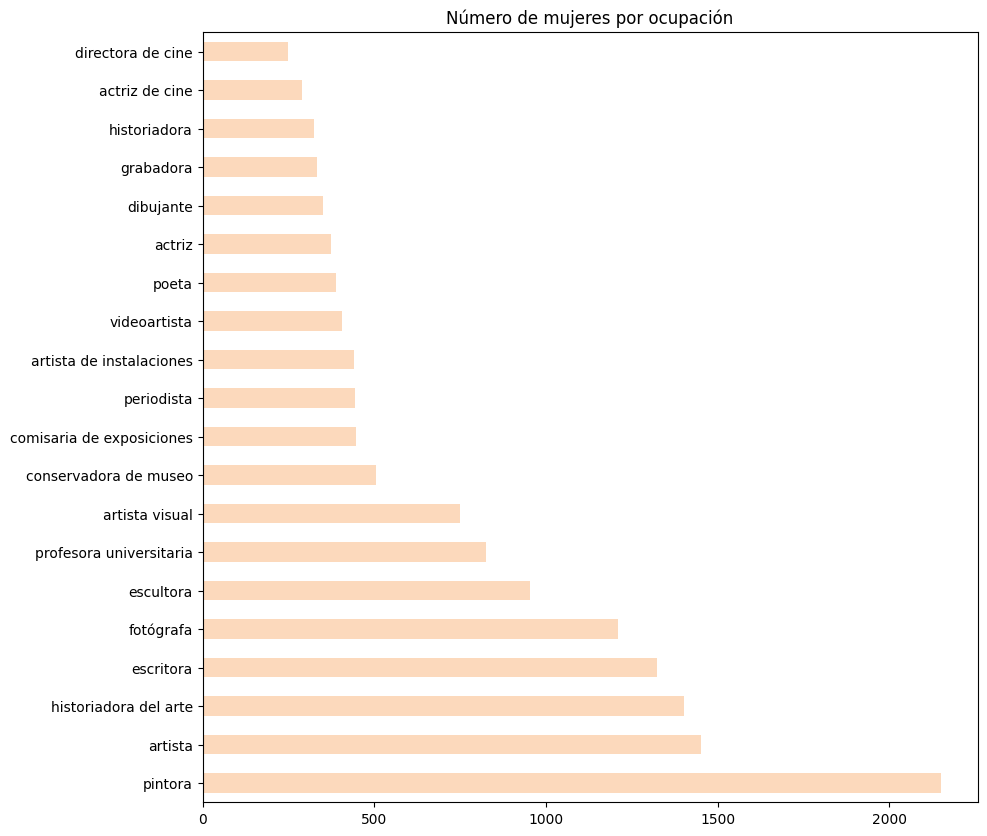

In [16]:
# Gráfico de barras de todas las ocupaciones
plt.figure(figsize=(10, 10))
profesiones[:20].plot(kind = 'barh', color='#FCD9BC')
plt.title('Número de mujeres por ocupación')
plt.show()

In [48]:
profesiones = pd.read_excel("visitaok.xls")

In [79]:
profesiones

,Encuesta de Hábitos y Prácticas Culturales 2021-2022,Column,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18,Column 19
0,,Museos,NaN,NaN,Exposiciones,NaN,NaN,Galerías de arte,NaN,NaN,Monumentos,NaN,NaN,Yacimientos arqueológicos,NaN,NaN,Archivos,NaN,NaN
1,,Total han visitado en un año,profesión,ocio,Total han visitado en un año,Por profesión o estudios,Por ocio o entretenimiento,Total han visitado en un año,Por profesión o estudios,Por ocio o entretenimiento,Total han visitado en un año,Por profesión o estudios,Por ocio o entretenimiento,Total han visitado en un año,Por profesión o estudios,Por ocio o entretenimiento,Total han visitado en un año,Por profesión o estudios,Por ocio o entretenimiento
2,,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022
3,TOTAL,100,6.3,93.7,100,8.6,91.4,100,6.9,93.1,100,4,96,100,5.1,94.9,100,36.7,63.3
4,Hombres,100,6.3,93.7,100,8.5,91.5,100,6.9,93.1,100,4.8,95.2,100,5.5,94.5,100,33.6,66.4
5,Mujeres,100,6.3,93.7,100,8.7,91.3,100,7,93,100,3.2,96.8,100,4.6,95.4,100,40,60
6,De 15 a 24 años,100,14.3,85.7,100,24.5,75.5,100,20.1,79.9,100,10.4,89.6,100,16,84,100,53.5,46.5
7,De 25 a 34 años,100,5.5,94.5,100,5.5,94.5,100,2.3,97.7,100,2.4,97.6,100,4.6,95.4,100,24.1,75.9
8,De 35 a 44 años,100,6.2,93.8,100,6.6,93.4,100,6,94,100,3.7,96.3,100,5.3,94.7,100,31.5,68.5
9,De 45 a 54 años,100,4.4,95.6,100,5.8,94.2,100,4.8,95.2,100,3,97,100,2.8,97.2,100,37.8,62.2


In [80]:
ocio = profesiones.loc[3, 'Column2']
profesion = profesiones.loc[3, 'Column3']

In [81]:
datos = [ocio, profesion]
etiquetas = ['Ocio', 'Profesión']
colores = ['#B68B67', '#FCD9BC']

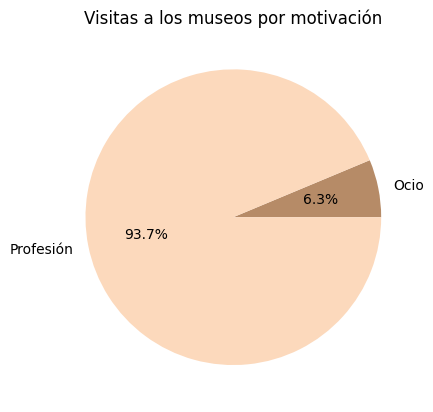

In [82]:

plt.pie(datos, labels=etiquetas, colors=colores, autopct='%1.1f%%')
plt.title('Visitas a los museos por motivación')



plt.show()


# Línea del tiempo

In [14]:
import matplotlib.pyplot as plt

In [112]:
import plotly.graph_objects as go



In [121]:
# Datos de la línea de tiempo
eventos = [
    {'nombre': 'Inauguración del Museo del Prado', 'año': 1819},
    {'nombre': 'Primera exposición dedicada a una mujer', 'año': 2016},
    {'nombre': 'Segunda exposición dedicada a una mujer', 'año': 2019},
    {'nombre': 'Tercera exposición dedicada a una mujer', 'año': 2021}
]



In [122]:
# Crear las listas de años y nombres de los eventos
años = [evento['año'] for evento in eventos]
nombres = [evento['nombre'] for evento in eventos]



In [123]:

# Crear la figura de la línea de tiempo
fig = go.Figure()


In [124]:


# Agregar la línea de tiempo como una serie de pasos
fig.add_trace(go.Scatter(
    x=años,
    y=[1] * len(años),  # Utilizamos el valor 1 para la coordenada y
    mode='lines+markers',
    line=dict(shape='hv', width=2),  # Estilo de línea horizontal y vertical
    marker=dict(size=10),
    text=nombres,
    hovertemplate='%{text}<extra></extra>',  # Mostrar el nombre del evento en el hover
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Exposiciones dedicadas a mujeres en el Prado',
    xaxis=dict(
        range=[1819, 2023],  # Rango de años
        dtick=40,  # Separación entre los ticks del eje x
        tickmode='linear',  # Modo lineal para los ticks del eje x
        title='Año'
    ),
    yaxis=dict(
        showticklabels=False,  # No mostrar los ticks del eje y
        showgrid=False,  # No mostrar las líneas de la cuadrícula del eje y
    ),
    hovermode='closest',  # Activar el hover más cercano al punto
)

# Mostrar la línea de tiempo
fig.show()

